
## Librerias

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import random
import sklearn 
import seaborn as sns
import matplotlib.pyplot as plt

## Carga de dataset

In [2]:
data = np.load('C:\\Users\\Best Computer\\Desktop\\Juan Erick Sr\\MaestriaCienciaDeDatos\\CienciaDeDatosConPython\\Proyecto\\proyecto_training_data.npy')


## Partición de base de datos en 80% entranamiento y 20% validación/test

In [3]:
np.random.seed(19810523)
idx_train = random.sample(range(len(data)), int(len(data)*.8))
idx_test = list(set(range(len(data))) - set(idx_train))

data_train = pd.DataFrame(data[idx_train,:])
data_train.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
data_train['grupo'] = 'training'

data_test = pd.DataFrame(data[idx_test,:])
data_test.columns = ['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage']
data_test['grupo'] = 'test'

dataset = data_train.append(data_test, ignore_index=True)


## Análsis exploratorio de datos

### Datos faltantes

In [4]:

dataset.isna().sum()

SalePrice         0
OverallQual       0
1stFlrSF          0
TotRmsAbvGrd      0
YearBuilt         0
LotFrontage     259
grupo             0
dtype: int64

### Estadísticos descriptivos


#### 1. DataSet total

In [5]:
eda = dataset.describe()
eda

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


#### 2. DataSet entrenamiento

In [6]:
eda_train = dataset[dataset['grupo'] == 'training'].describe()
eda_train

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,947.000000
mean,182121.506849,6.128425,1169.465753,6.551370,1972.158390,69.964097
std,79542.488428,1.377608,395.223127,1.629031,29.923663,24.452197
min,35311.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,131500.000000,5.000000,882.000000,5.000000,1954.000000,59.500000
50%,165500.000000,6.000000,1091.000000,6.000000,1975.000000,70.000000
75%,214000.000000,7.000000,1405.500000,7.000000,2001.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


#### 3. DataSet validación / test

In [7]:
eda_test = dataset[dataset['grupo'] == 'test'].describe()
eda_test

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,292.000000,292.000000,292.000000,292.000000,292.000000,254.000000
mean,176119.952055,5.982877,1135.270548,6.383562,1967.705479,70.370079
std,78994.533362,1.400680,349.214010,1.606517,31.092848,23.694633
min,34900.000000,2.000000,438.000000,3.000000,1893.000000,21.000000
25%,123000.000000,5.000000,883.500000,5.000000,1947.500000,58.250000
50%,150375.000000,6.000000,1067.500000,6.000000,1969.000000,69.000000
75%,214600.000000,7.000000,1362.250000,7.000000,1999.250000,81.750000
max,555000.000000,10.000000,2402.000000,12.000000,2009.000000,174.000000


### Observaciones

1. Solo se observa que  la variable LofFrontage presenta anomalias al tener datos vacios. 
2. El precio promedio de una casa es de 182K.
3. No se observa datos atipicos en todas las variables.
4. Los estadísticos descriptivos entre la partición  total, entrenamiento y validación son muy similares esto indica que no hay sesgo en las particiones.


### HISTOGRAMAS

#### 1. SalePrice

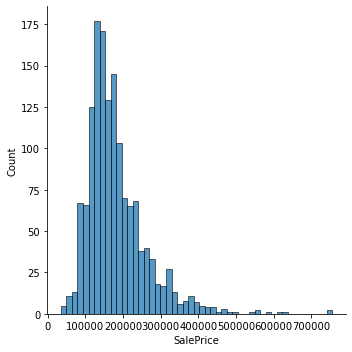

In [15]:
sns.displot(dataset['SalePrice']) 


#### 2. OverallQual

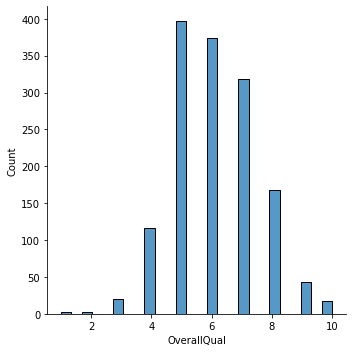

In [17]:
sns.displot(dataset['OverallQual'])


#### 3. 1stFlrSF

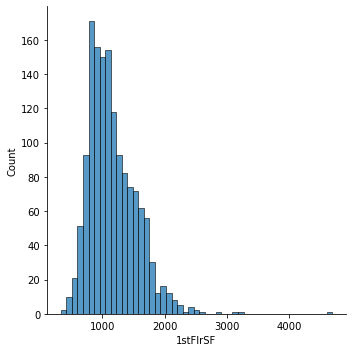

In [18]:
sns.displot(dataset['1stFlrSF'])


#### 4. TotRmsAbvGrd

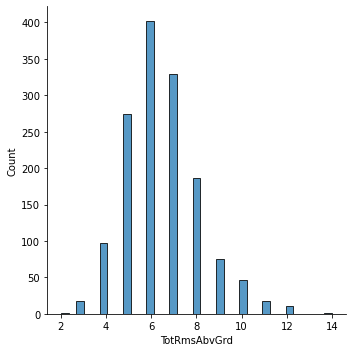

In [19]:
sns.displot(dataset['TotRmsAbvGrd'])


#### 5. YearBuilt

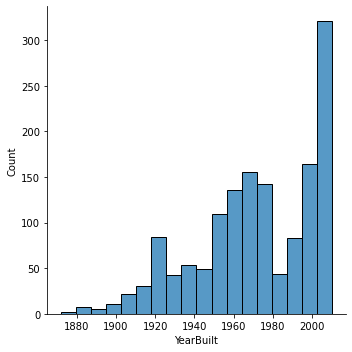

In [20]:
sns.displot(dataset['YearBuilt'])


#### 6. LotFrontage

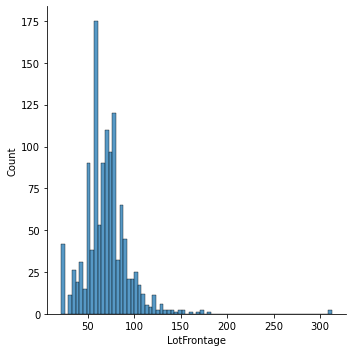

In [21]:
sns.displot(dataset['LotFrontage'])

### SCARTPLOT

#### 1. OverallQual

Text(0.5, 1.0, 'La correlación es 0.791')

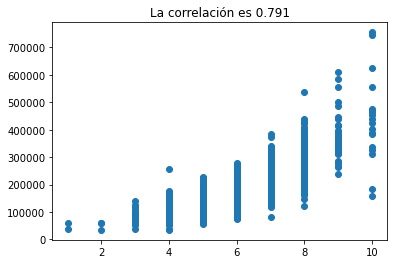

In [24]:
plt.scatter(x='OverallQual', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["OverallQual"])[0],3)}')


#### 2. 1stFlrSF

Text(0.5, 1.0, 'La correlación es 0.606')

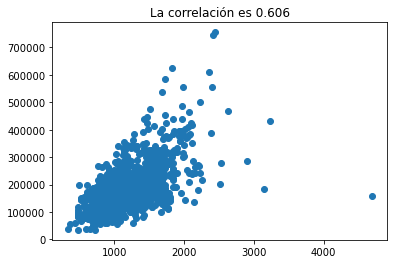

In [25]:
plt.scatter(x='1stFlrSF', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["1stFlrSF"])[0],3)}')


#### 3. TotRmsAbvGrd

Text(0.5, 1.0, 'La correlación es 0.534')

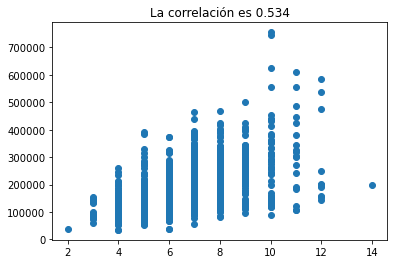

In [26]:
plt.scatter(x='TotRmsAbvGrd', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["TotRmsAbvGrd"])[0],3)}')


#### 4. YearBuilt

Text(0.5, 1.0, 'La correlación es 0.523')

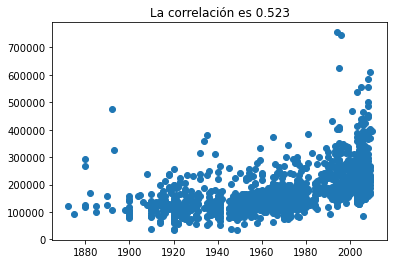

In [27]:
plt.scatter(x='YearBuilt', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset["SalePrice"], dataset["YearBuilt"])[0],3)}')


#### 5. LotFrontage

Text(0.5, 1.0, 'La correlación es 0.352')

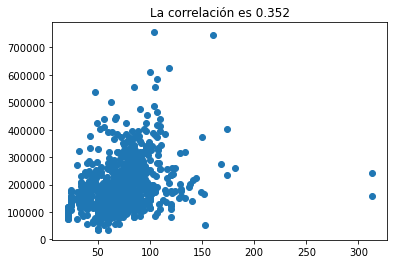

In [28]:
plt.scatter(x='LotFrontage', y='SalePrice', data = dataset); plt.title(f'La correlación es {round(pearsonr(dataset[~pd.isna(dataset["LotFrontage"])]["SalePrice"], dataset[~pd.isna(dataset["LotFrontage"])]["LotFrontage"])[0],3)}')


### Variables con más potencial predictivo

<AxesSubplot:>

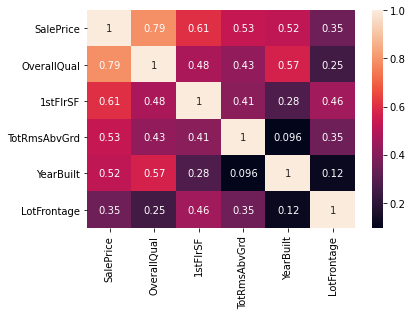

In [29]:
sns.heatmap(dataset.corr(), annot = True)
